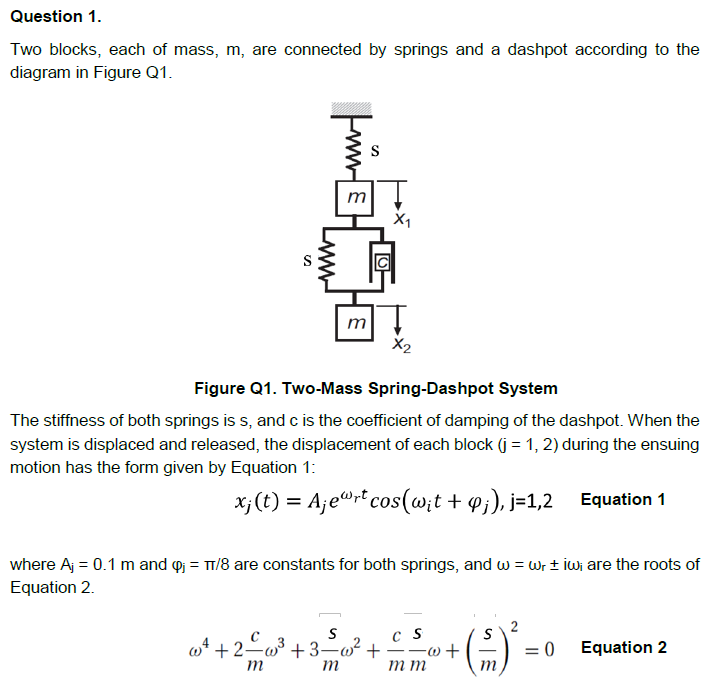

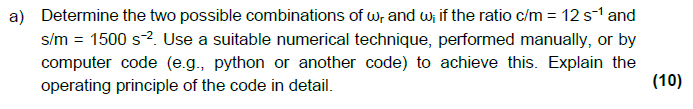

In [1]:
import numpy as np

cm = 12
sm = 1500

poly = [1, 2*cm, 3*sm, (cm)*(sm),(sm)**2]

print(np.roots(poly))


[-11.37698037+61.35447281j -11.37698037-61.35447281j
  -0.62301963+24.03024141j  -0.62301963-24.03024141j]


For a polynomial of degree n, we can generate a companion matrix A of size n x n and such that the charicteristics of its polynomial is identical to the polynomial that we intend to solve. This  means that the eigenvalues of the matrix A are the roots of its polynomial and therefore the roots of the polynomial we intend to solve.

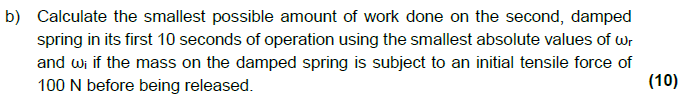

In [1]:
import scipy.integrate as integrate
import numpy as np


Aj = 0.1
phij = np.pi/8
wr = 0.62301963
wi = 24.03024141

cm = 12
sm = 1500
F = 100
s = F/Aj
m = sm/s
c = cm/m
print(m)
print(c)

# disp = lambda t: Aj*np.exp(wr*t)*np.cos(wi*t + phij)
# velo = integrate.quad(disp,0,10)
velo_fn = lambda t: Aj*(wr*np.exp(wr*t))*np.cos(wi*t + phij)-Aj*(wi*np.exp(wr*t)*np.sin(wi*t+phij))
print(velo_fn(10))

power = c*velo_fn(10)**2

print(power)




1.5
8.0
-1151.9863141489648
10616579.743892139


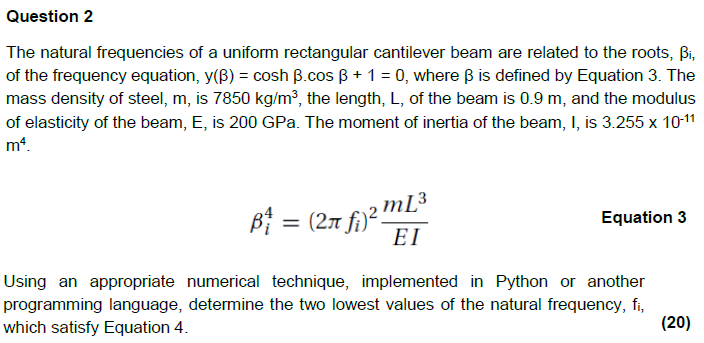

The solutions are: -1.8751040687113019, 1.8751040687119307
[-1.8751040687113019, 1.8751040687119307]
18.87394937192249
18.873949371935147


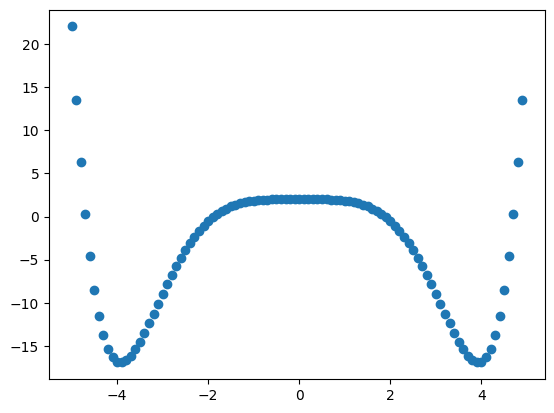

In [30]:
import numpy as np
import scipy.optimize as optimize
import matplotlib.pyplot as plt

# fi = np.arange(0,1,0.01)
# fi = 1
m = 7850/1000000000
L = 0.9*1000
E = 200000
I = 3.255e-11*1000000000000  
B = np.arange(-5,5,0.1)
# B = [5]
# print(B)

y_val = []
y = lambda B: (np.cosh(B)*np.cos(B))+1

for i in B:
    y_val.append(y(i)) # = 0

# print(B)
# print(y_val)

plt.scatter(B,y(B))
# plt.ylim(-1000)

def secant(f,a,b,N):
    # f = function [manually define]
    # a, b = search interval
    # N = Number of iterations
    if f(a)*f(b) >= 0:
        print("Secant method fails.")
        return None
    a_n = a
    b_n = b
    for n in range(1,N+1):
        m_n = a_n - f(a_n)*(b_n - a_n)/(f(b_n) - f(a_n))
        f_m_n = f(m_n)
        if f(a_n)*f_m_n < 0:
            a_n = a_n
            b_n = m_n
        elif f(b_n)*f_m_n < 0:
            a_n = m_n
            b_n = b_n
        elif f_m_n == 0:
            print("Found exact solution.")
            return m_n
        else:
            print("Secant method fails.")
            return None
    return a_n - f(a_n)*(b_n - a_n)/(f(b_n) - f(a_n))

solution_neg = secant(y,-10,0,100000)
solution_pos = secant(y,0,10,100000)
print(f'The solutions are: {solution_neg}, {solution_pos}')
solutions = [solution_neg, solution_pos]
print(solutions)



freq = lambda B: (np.sqrt(B**4*((E*I)/(m*L**3))))/(2*np.pi)

# for i in solutions:
#     fi = freq(i)

fi = freq(solution_neg)    
print(fi)
fi = freq(solution_pos)
print(fi)



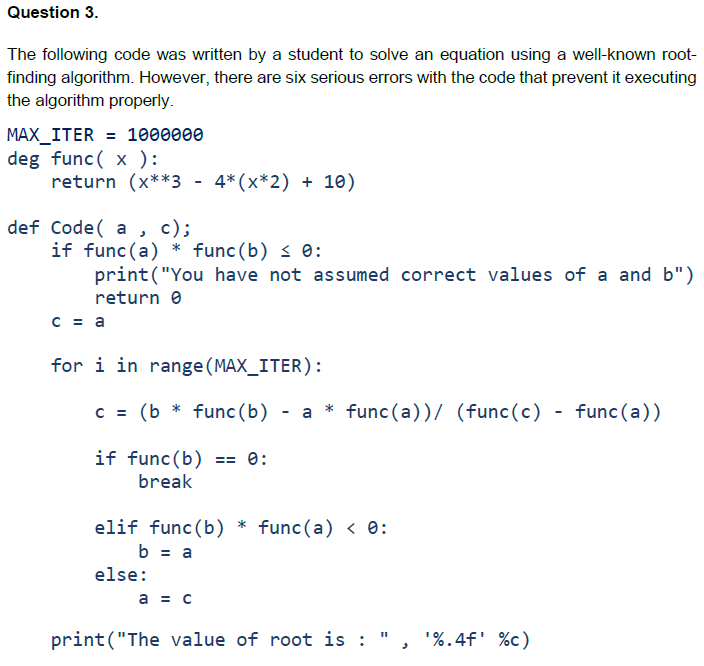

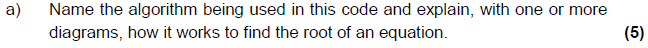

The algorithm used is the Secant method. The secant method requires a function f(x), a specified number of iterations n, and two x-values x0 and x1 to form a test range. The corresponding y-values of the test range is obtained from the function f(x), and a straight line of infinite length is drawn through the two points. The x-intercept of the straight line is the next x-value and it replaces (x0), the original x-value. The calculations are repeated to calculate x(n+1), which replaces x(n-1). The algorithm repeats until it reaches the number of iterations n.

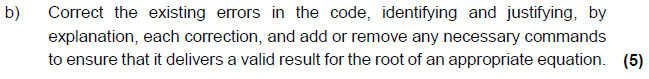

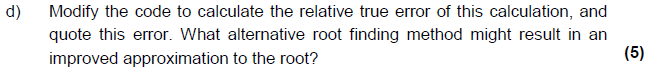